Saved model file static/Models/PCALDA.pkl
LDA with PCA Accuracy: 77.08%
[[ 4  0  0  7]
 [ 1 40  4  0]
 [ 1  2  5  0]
 [ 2  5  0 25]]


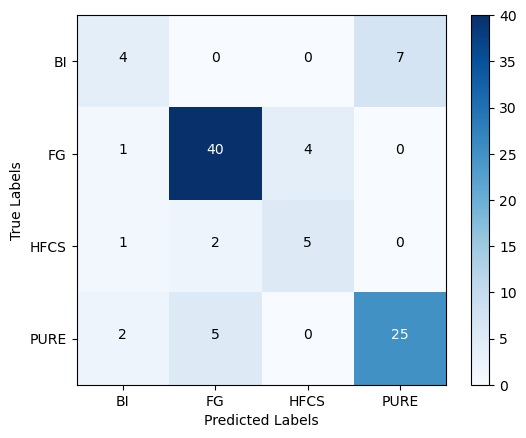

Saved model file static/Models/PCAQDA.pkl
QDA with PCA Accuracy: 85.42%
[[ 8  0  3  0]
 [ 1 41  2  1]
 [ 0  0  8  0]
 [ 2  4  1 25]]


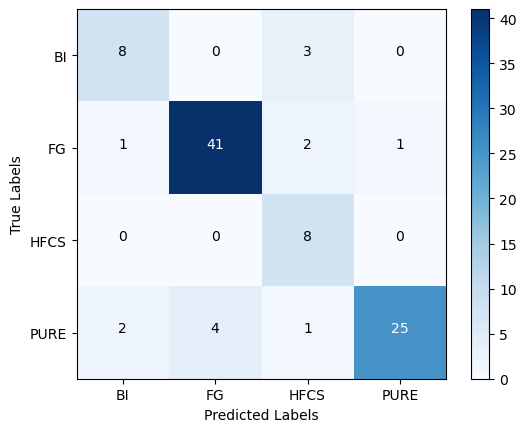

Saved model file static/Models/PCASVM.pkl
SVM with PCA Accuracy: 89.58%
[[11  0  0  0]
 [ 0 44  1  0]
 [ 1  0  7  0]
 [ 1  6  1 24]]


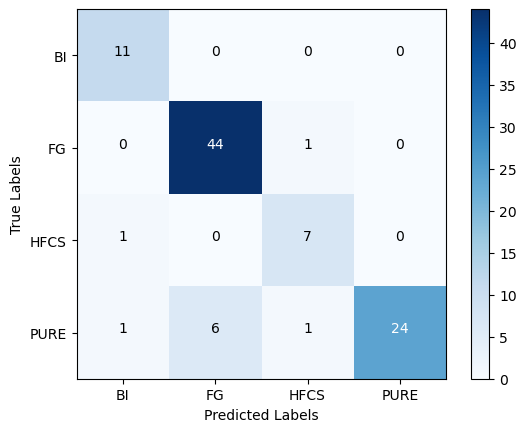

Saved model file static/Models/PCAKNN.pkl
KNN with PCA Accuracy: 91.67%
[[11  0  0  0]
 [ 0 45  0  0]
 [ 1  0  7  0]
 [ 1  6  0 25]]


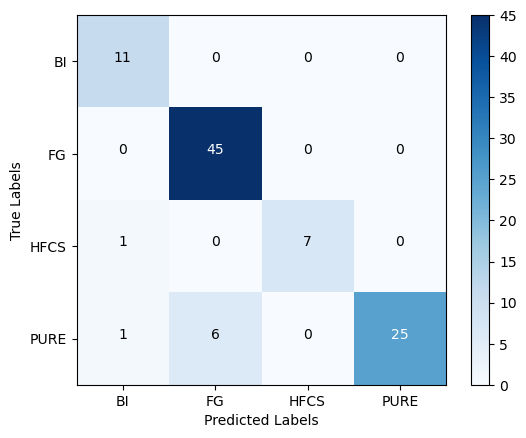

In [2]:
# Importing all necessary Libraries
import pyreadr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.utils import extmath
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import confusion_matrix
from sklearn import metrics 
from mpl_toolkits import mplot3d
# Data preprocessing


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, KernelCenterer, LabelEncoder
from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import SGDClassifier
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap

# Machine Learning Algorithms
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cross_decomposition import PLSRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.cross_decomposition import PLSRegression

def get_pca_df(X_train_df,X_test_df,y_train,y_test):
# Fitting and transforming training but only transforming test dataset
    pca=PCA(n_components=3)
    X_train_pca=pca.fit_transform(X_train_df)

# X_test_pca=pca.fit_transform(X_train_df)
# Generating Explained Variance Ratio and singular values
    explained_variance = pca.explained_variance_ratio_
    singular_values = pca.singular_values_
    X_test_pca=pca.transform(X_test_df)

# Building PCA DataFrame of train Dataset
    pca_train_df = pd.DataFrame(data = X_train_pca,
                     columns = ["PC1", 
                                "PC2",
                                "PC3"
                                ])
    pca_train_df=pca_train_df.reset_index(drop=True)
    pca_train_df['Target']=y_train

# Building PCA DataFrame of test Dataset

    pca_test_df = pd.DataFrame(data = X_test_pca,
                     columns = ["PC1", 
                                "PC2",
                                "PC3"
                                ])
    pca_test_df=pca_test_df.reset_index(drop=True)
# pca_test_df_withlabels=pca_test_df.copy()
    return (pca_train_df,pca_test_df)
# end get_pca_df

def gen_confusion_mat(test_df, pred_labels,algo_name):
    conf_mat=confusion_matrix(y_test, pred_labels)
    print(conf_mat)
    cmap = plt.cm.get_cmap('Blues')

# Plotting confusion matrix as heatmap
    plt.imshow(conf_mat, interpolation='nearest', cmap=cmap)
    plt.colorbar()

# Set labels
    tick_marks = np.arange(len(np.unique(test_df)))
    plt.xticks(tick_marks, np.unique(test_df))
    plt.yticks(tick_marks, np.unique(test_df))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

# Adding text to every cell to show the count
    mid = conf_mat.max() / 2.
    for i, j in np.ndindex(conf_mat.shape):
        plt.text(j, i, conf_mat[i, j],
                 horizontalalignment="center",
                 color="white" if conf_mat[i, j] > mid else "black")

# Show and save the confusion matrix plot
    fig_name=f"{algo_name}.png"
    plt.savefig(f"static/Graphs/{fig_name}")
    plt.show()

# end gen_confusion_mat
    

honeydata_df=pd.read_csv('static/data/honeydata.csv')

honeydata_df=honeydata_df.drop('label',axis=1) # Dropping label columns as Honey Label provides specific information
honeydata_df["label.full"]=honeydata_df["label.full"].map(str.upper)
# Renaming column name to meaningful name 
honeydata=honeydata_df.rename(columns={"label.full": "Honey Label"})


label_full = honeydata["Honey Label"].copy()
honey_no_labels=honeydata.iloc[ :,:700].copy()
labels_only=honeydata['Honey Label'].copy()

# Tested with 20:80 as well as 30:70 split but best accuracy could be found using 20:80, hence using only 80:20
# X_train, X_test, y_train, y_test = train_test_split(honey_no_labels, labels_only,test_size=0.30,stratify=labels_only,random_state=1)

X_train, X_test, y_train, y_test = train_test_split(honey_no_labels, labels_only,test_size=0.20,stratify=labels_only,random_state=1)

X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

pca_train_df,pca_test_df=get_pca_df(X_train,X_test,y_train,y_test)

# Using Linear Discriminant Analysis (LDA)

X=pca_train_df[['PC1','PC2','PC3']]
y=pca_train_df['Target']

lda_obj = LDA()
lda_obj.fit(X, y)

pickle.dump(lda_obj, open('static/Models/PCALDA.pkl','wb'))
print ('Saved model file static/Models/PCALDA.pkl')
pred_honey_label=lda_obj.predict(pca_test_df)
lda_accuracy = metrics.accuracy_score(y_test, pred_honey_label)
print("LDA with PCA Accuracy: {:.2f}%".format(lda_accuracy * 100))
# Generating confusion matrix
gen_confusion_mat(y_test, pred_honey_label,'PCALDA')                

# Using Quadratic Discriminant Analysis (QDA)

qda_obj = QDA()
qda_obj.fit(X, y)
pickle.dump(qda_obj, open('static/Models/PCAQDA.pkl','wb'))
print ('Saved model file static/Models/PCAQDA.pkl')
qda_pred_honey=qda_obj.predict(pca_test_df)

qda_Accuracy = metrics.accuracy_score(y_test, qda_pred_honey)
print("QDA with PCA Accuracy: {:.2f}%".format(qda_Accuracy * 100))
# Generating confusion matrix
gen_confusion_mat(y_test, qda_pred_honey,'PCAQDA')  
                
# Using Support Vector Machine (SVM)

SVM_obj= svm.SVC()
SVM_obj.fit(X,y)
pickle.dump(SVM_obj, open('static/Models/PCASVM.pkl','wb'))
print ('Saved model file static/Models/PCASVM.pkl')

SVM_pred_honey_label=SVM_obj.predict(pca_test_df)
SVM_pca_accuracy = metrics.accuracy_score(y_test, SVM_pred_honey_label)
print("SVM with PCA Accuracy: {:.2f}%".format(SVM_pca_accuracy * 100))

# Generating confusion matrix
gen_confusion_mat(y_test, SVM_pred_honey_label,'PCASVM')  

# Using K-Nearest Neighbors (KNN)

KN_obj=KNeighborsClassifier(n_neighbors=5)
KN_obj.fit(X,y)
pickle.dump(KN_obj, open('static/Models/PCAKNN.pkl','wb'))
print ('Saved model file static/Models/PCAKNN.pkl')
KN_pred_honey_label=KN_obj.predict(pca_test_df)
KN_pca_accuracy = metrics.accuracy_score(y_test, KN_pred_honey_label)
print("KNN with PCA Accuracy: {:.2f}%".format(KN_pca_accuracy * 100))
                
# Generating confusion matrix
gen_confusion_mat(y_test, KN_pred_honey_label,'PCAKNN')  
